In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load degrees

In [11]:
deg_small = pd.read_csv('degrees/degree_small.csv', index_col=0)
deg_big = pd.read_csv('degrees/degree.csv', index_col=0)
deg_small_er = pd.read_csv('degrees/degree_small_after_er.csv', index_col=0)
deg_big_er = pd.read_csv('degrees/degree_big_after_er.csv', index_col=0)

# mean and std

In [12]:
# calculate the average degree of the graph
avg_deg_small = deg_small['degree'].mean()
avg_deg_big = deg_big['degree'].mean()
avg_deg_small_er = deg_small_er['degree'].mean()
avg_deg_big_er = deg_big_er['degree'].mean()

# calculate the standard deviation of the degree of the graph
std_deg_small = deg_small['degree'].std()
std_deg_big = deg_big['degree'].std()
std_deg_small_er = deg_small_er['degree'].std()
std_deg_big_er = deg_big_er['degree'].std()

# print the results
print(f'small graph: mean {avg_deg_small}, std {std_deg_small}')
print(f'big graph: mean {avg_deg_big}, std {std_deg_big}')
print(f'small graph after ER: mean {avg_deg_small_er}, std {std_deg_small_er}')
print(f'big graph after ER: mean {avg_deg_big_er}, std {std_deg_big_er}')

small graph: mean 3.44836293974225, std 11.431451300319182
big graph: mean 2.6881838074398248, std 6.370866023998723
small graph after ER: mean 4.236307231493368, std 14.20852588796728
big graph after ER: mean 3.414080592867068, std 8.376333711097272


In [88]:
deg_small_er["degree"].max()
deg_big_er["degree"].max()

279

# Distribution of degrees

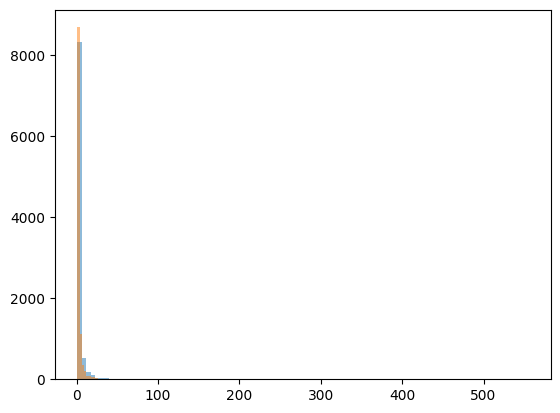

In [30]:
# histogram of the degree of the graph
plt.hist(deg_small_er["degree"], bins=100, alpha=0.5, label='small graph after ER')
plt.hist(deg_big_er['degree'], bins=100, alpha=0.5, label='big graph after ER')
plt.show()

# most refered to

In [18]:
# the id with the highest degree
max_deg_small = deg_small['degree'].idxmax()
max_deg_big = deg_big['degree'].idxmax()
max_deg_small_er = deg_small_er['degree'].idxmax()
max_deg_big_er = deg_big_er['degree'].idxmax()

# print the results
print(f'small graph: node {max_deg_small} has the highest degree')
print(f'big graph: node {max_deg_big} has the highest degree')
print(f'small graph after ER: node {max_deg_small_er} has the highest degree')
print(f'big graph after ER: node {max_deg_big_er} has the highest degree')

small graph: node 313 has the highest degree
big graph: node 853 has the highest degree
small graph after ER: node Lemma has the highest degree
big graph after ER: node Equation has the highest degree


# 10 most refered to

In [91]:
# the 10 ids with the highest degree
top10_deg_small_er = deg_small_er.nlargest(30, 'degree')
top10_deg_big_er = deg_big_er.nlargest(30, 'degree')

print('small graph after ER: top 10 nodes with highest degree')
print(top10_deg_small_er)
print('big graph after ER: top 10 nodes with highest degree')
print(top10_deg_big_er)

# for i in range(20):
#     print(f'{top10_deg_small_er.index[i]} & {top10_deg_small_er["degree"][i]} & {top10_deg_big_er.index[i]}& {top10_deg_big_er["degree"][i]}')


small graph after ER: top 10 nodes with highest degree
            degree
n.id              
Lemma          555
m              398
n              348
B              324
A              230
K              227
log m          222
C              217
k              187
c              183
tr(B)          182
\n             179
β*             175
λ              164
s0             161
d              154
f              152
E              149
ε              146
C0             146
σ              135
α              135
τB             132
v              129
X              123
M              122
β              122
bβ             121
Theorems 3     116
b0             115
big graph after ER: top 10 nodes with highest degree
                             degree
n.id                               
Equation                        279
B                               190
n                               187
m                               153
β*                              147
Inequality                      

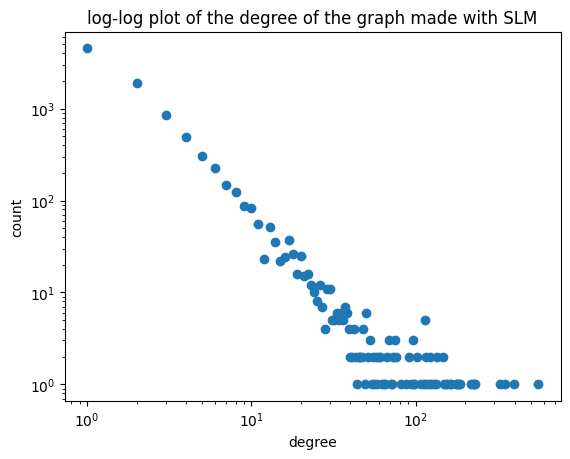

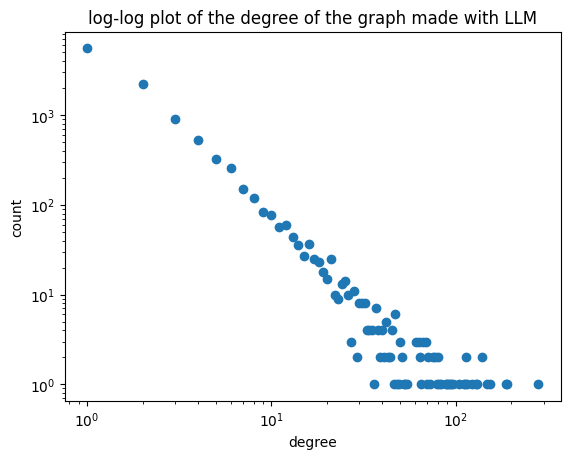

In [47]:
# log log plot of the degree of the graph
small = deg_small_er['degree'].value_counts().reset_index()
plt.loglog(small['degree'], small["count"], 'o', label='small graph after ER')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('log-log plot of the degree of the graph made with SLM')
plt.show()
big = deg_big_er['degree'].value_counts().reset_index()
plt.loglog(big['degree'], big["count"], 'o', label='big graph after ER')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('log-log plot of the degree of the graph made with LLM')
plt.show()

Text(0, 0.5, 'degree')

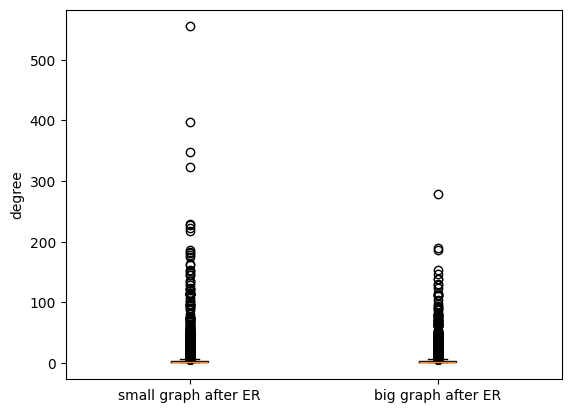

In [49]:
# boxplot of the degree of the graph
plt.boxplot([deg_small_er['degree'], deg_big_er['degree']])
plt.xticks([1, 2], ['small graph after ER', 'big graph after ER'])
plt.ylabel('degree')

In [52]:
# Q1 and Q3 of the degree of the graph
Q1_small_er = deg_small_er['degree'].quantile(0.25)
Q3_small_er = deg_small_er['degree'].quantile(0.75)
Q1_big_er = deg_big_er['degree'].quantile(0.25)
Q3_big_er = deg_big_er['degree'].quantile(0.75)

print(f'small graph after ER: Q1 {Q1_small_er}, Q3 {Q3_small_er}')
print(f'big graph after ER: Q1 {Q1_big_er}, Q3 {Q3_big_er}')


small graph after ER: Q1 1.0, Q3 3.0
big graph after ER: Q1 1.0, Q3 3.0


In [58]:
deg_big_er["degree"].quantile([0.25, 0.5, 0.99])

0.25     1.00
0.50     1.00
0.99    33.06
Name: degree, dtype: float64

# percentage with d=1

In [68]:
small_d1 = len(deg_small_er["degree"][deg_small_er["degree"]==1])
big_d1 = len(deg_big_er["degree"][deg_big_er["degree"]==1])

print(f'small graph after ER: {small_d1/len(deg_small_er["degree"])*100:.2f}% nodes have degree 1')
print(f'big graph after ER: {big_d1/len(deg_big_er["degree"])*100:.2f}% nodes have degree 1')

small graph after ER: 48.52% nodes have degree 1
big graph after ER: 51.37% nodes have degree 1


# Density

In [86]:
dense_small = 48731/(17225*17224)
dense_big = 45749/(18401*18400)

print(f'small graph: density {dense_small:.3}')
print(f'big graph: density {dense_big:.3}')

small graph: density 0.000164
big graph: density 0.000135
